# Community Detection - Workshop 8: SNA Measures

COSC2671 Social Media and Network Analytics

Lisa Morii, RMIT University, 2023


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd

In [2]:
sFileName = "veganClimateUsers.graphml_0_20231011160343.graphml"

First we read back the graph we constructed and compute the degree centrality

In [3]:
# read it back in to demonstrate it works
replyGraph = nx.readwrite.read_graphml(sFileName)


# computing the degree centrality and plotting it
lDegCentrality = nx.degree_centrality(replyGraph)


#
# TODO: write code to compute eigenvetor and katz centrality
# lEigenVectorCentrality = ...
#
lEigenVectorCentrality = nx.eigenvector_centrality(replyGraph)
lKatzCentrality = nx.katz_centrality(replyGraph)


The following code displayes the histograms of the degree, eigenvector and katz centrality values of the graph.

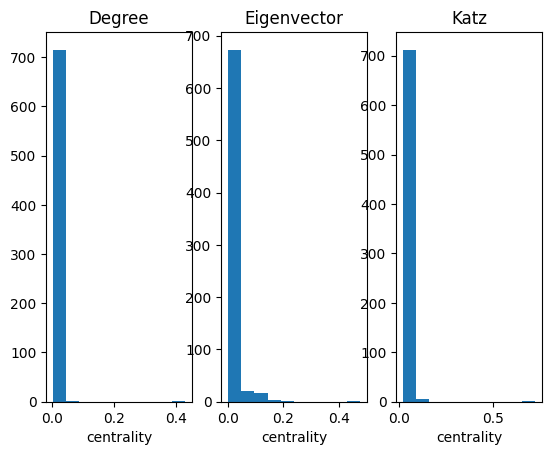

In [4]:
# plot histograms
plt.subplot(1,3,1)
plt.hist(list(lDegCentrality.values()))
plt.title('Degree')
plt.xlabel('centrality')
#
# TODO: plot the other two histograms
#
# eigenvector centrality
plt.subplot(1, 3, 2)
plt.hist(list(lEigenVectorCentrality.values()))
plt.title('Eigenvector')
plt.xlabel('centrality')
# katz centrality
plt.subplot(1, 3, 3)
plt.hist(list(lKatzCentrality.values()))
plt.title('Katz')
plt.xlabel('centrality')

plt.show()

* Degree Centrality: # of direct connections
* Eigenvector Centrality: How close related to other centrality (the quality of connections)
* Kats Centrality: Both the number and quality of connections while accounting for paths of different lengths.

##### What does the histograms indicate? Why do you think they have slightly different distributions?

* Degree Centrality Histogram: This will likely show a distribution with many nodes having low centrality and a few nodes having high centrality.
* Eigenvector Centrality Histogram: This distribution may be more balanced, with a smoother transition from low to high centrallity. Nodes with conncetions to other highly central nodes will have higher centrality. 
* Katz Centrality Histogram: The distribution will depend on the choice of the alpha parameter. Smaller alpha values might lead to a distribution similat to degree cetrality, while larger alpha centrality will give more weight to longer paths possibly leading to a distribution similar to eigenvector centrality. 

The reason for the slightly different distributions is due to the different algorithms and underlying principles of each centrality measure. Degree centrality only considers the number of connections, eigenvector centrality considers the quality of connections, and Katz centrality considers both the number and quality of connections while also accounting for paths of different lengths. The choice of alpha in Katz centrality can further affect the distribution. Different networks and their structures can also lead to variations in the centrality distributions.

The following code computes the SNA statistics/measures to do with centrality, clustering coefficient, connected components and bridges.

In [5]:
#
# TODO: update the node attributes with centrality
#
# eigenvector centrality, stored in node attribute 'eigen'
for nodeId, cent in lEigenVectorCentrality.items():
    replyGraph.nodes[nodeId]['eigen'] = float(cent)

# katz centrality, stored in node attribute 'katz'
for nodeId, cent in lKatzCentrality.items():
    replyGraph.nodes[nodeId]['katz'] = float(cent)


#
# TODO: write out graph to new file
#
nx.readwrite.write_graphml(replyGraph, 'mod' + sFileName, infer_numeric_types=True)


#
# TODO: compute the other SNA measures specified in the lab
#

#
# compute clustering
# the networkx code is within format(...)
#
print('Global clustering coefficient/transitivit = {}'.format(nx.transitivity(replyGraph)))


#
# compute components
#
print('number of strongly connected components = {}'.format(nx.number_strongly_connected_components(replyGraph)))
print('number of weakly connected components = {}'.format(nx.number_weakly_connected_components(replyGraph)))



#
# compute bridges
#
print(list(nx.bridges(replyGraph.to_undirected())))


Global clustering coefficient/transitivit = 0.030303030303030304
number of strongly connected components = 481
number of weakly connected components = 9
[('AvianLawman', 'Pathfinder24'), ('AvianLawman', 'IDinnaeKen'), ('AvianLawman', 'khart360'), ('AvianLawman', 'TheMightyPikachu'), ('AvianLawman', 'FeanorNoldor'), ('AvianLawman', 'caymanrogers'), ('AvianLawman', 'JVince13'), ('AvianLawman', 'toolymegapoopoo'), ('AvianLawman', 'RealHorrorShowvv'), ('AvianLawman', 'AemonDK'), ('AvianLawman', 'zargthuul'), ('AvianLawman', 'AppleWedge'), ('AvianLawman', 'voteferpedro'), ('AvianLawman', 'carthuscrass'), ('AvianLawman', 'AChero9'), ('AvianLawman', 'iblametheowl2'), ('AvianLawman', 'uhhh-ok'), ('AvianLawman', 'adtechheck'), ('AvianLawman', 'AutoModerator'), ('AvianLawman', 'karth'), ('AvianLawman', 'ablake0406'), ('AvianLawman', 'NewComputerWhoDiz'), ('AvianLawman', 'SquareThings'), ('AvianLawman', 'woodzopwns'), ('AvianLawman', 'bobbomotto'), ('AvianLawman', 'F4Z3_G04T'), ('AvianLawman', 'j

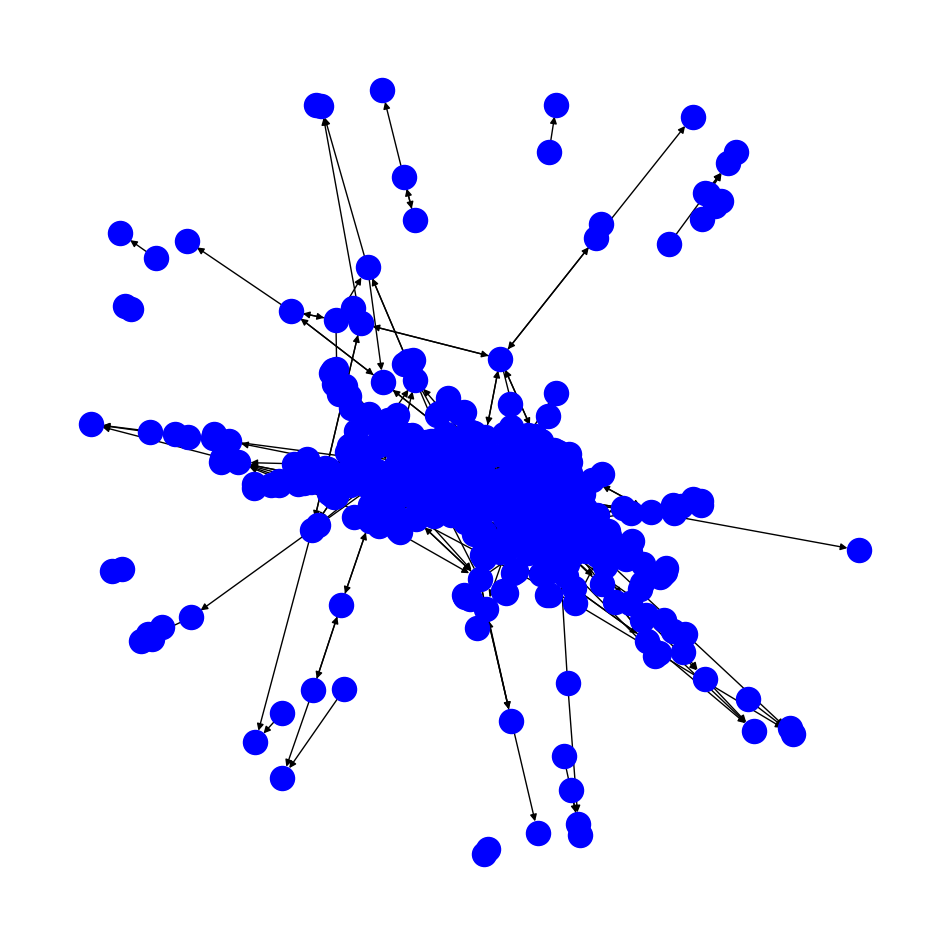

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def read_and_draw_graphml(filename):
    # Read the .graphml file into a NetworkX graph object
    G = nx.read_graphml(filename)
    
    # Draw the graph
    # Create a plot with specified size (width, height)
    plt.figure(figsize=(12, 12))
    # You can customize the layout and appearance as you like
    pos = nx.spring_layout(G)  # positions for all nodes
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color="blue")


    # Draw edges
    nx.draw_networkx_edges(G, pos)
    
    # Draw node labels
#     nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
    
    # Add edge labels if they exist
    if nx.get_edge_attributes(G, 'weight'):
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.axis("off")
    plt.show()

# Replace 'example.graphml' with your filename
read_and_draw_graphml('modveganClimateUsers.graphml_0_20231011160343.graphml')

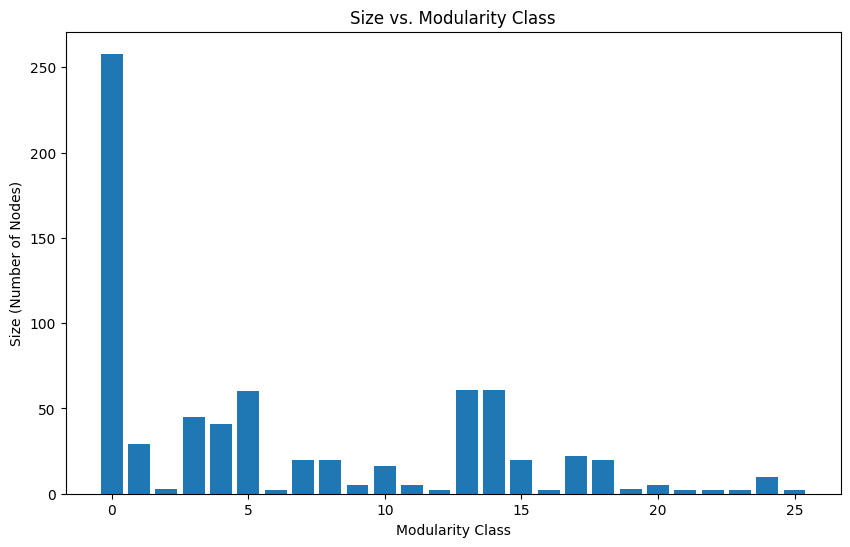

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import community  # Install python-louvain library (pip install python-louvain) for the Louvain method

# Read the .graphml file into a NetworkX graph object
G = nx.read_graphml(sFileName)

# Create your graph (replace this with your own graph data)
# Ensure the graph is undirected
G = G.to_undirected()

# Detect communities using the Louvain method
partition = community.best_partition(G)

# Calculate the size (number of nodes) of each community
community_sizes = {}
for node, mod_class in partition.items():
    if mod_class not in community_sizes:
        community_sizes[mod_class] = 1
    else:
        community_sizes[mod_class] += 1

# Create a list of community sizes and modularity classes
modularity_classes = list(community_sizes.keys())
sizes = [community_sizes[mod_class] for mod_class in modularity_classes]

# Create a bar plot of Size vs. Modularity Class
plt.figure(figsize=(10, 6))
plt.bar(modularity_classes, sizes)
plt.xlabel('Modularity Class')
plt.ylabel('Size (Number of Nodes)')
plt.title('Size vs. Modularity Class')
plt.show()


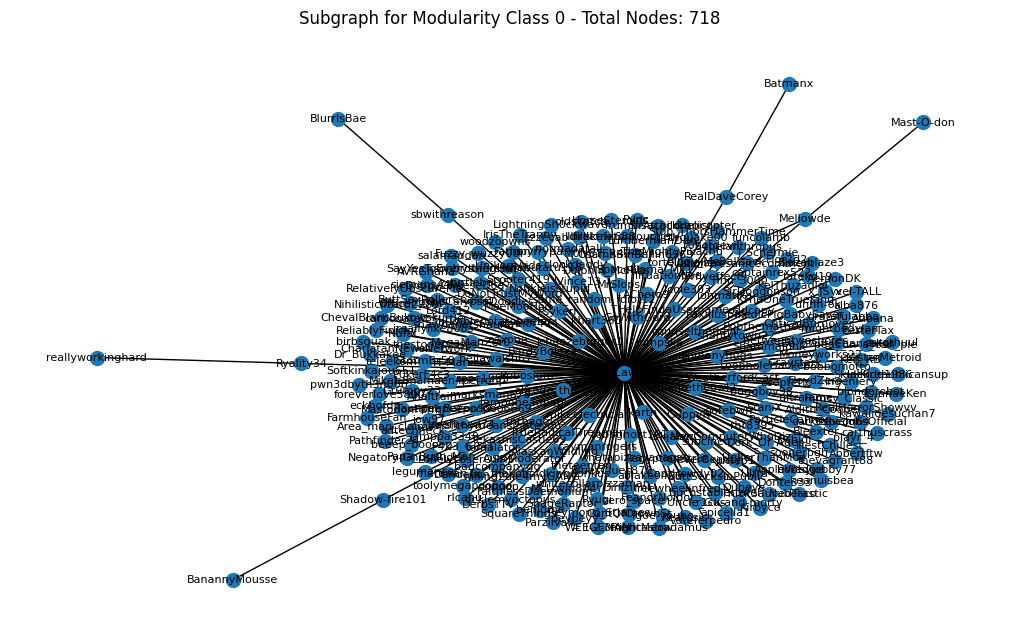

In [8]:
import networkx as nx

# Read the .graphml file into a NetworkX graph object
G = nx.read_graphml(sFileName)

# Ensure the graph is undirected
G = G.to_undirected()

# Detect communities using the Louvain method
partition = community.best_partition(G)

# Specify the modularity class you want to visualize
selected_modularity_class = 0  # Replace with the desired modularity class

# Create a list of nodes in the selected modularity class
selected_nodes = [node for node, mod_class in partition.items() if mod_class == selected_modularity_class]

# Create a subgraph containing only the nodes in the selected modularity class
subgraph = G.subgraph(selected_nodes)

# Get the total number of nodes in the graph
total_nodes = G.number_of_nodes()

# Visualize the subgraph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(subgraph)  # Use a layout algorithm to position nodes
nx.draw(subgraph, pos, with_labels=True, node_size=100, font_size=8)
plt.title(f'Subgraph for Modularity Class {selected_modularity_class} - Total Nodes: {total_nodes}')
plt.show()


In [9]:
# Find the center node of the community (subgraph) using degree centrality
center_node = max(subgraph, key=lambda node: subgraph.degree(node))

print(center_node)

AvianLawman


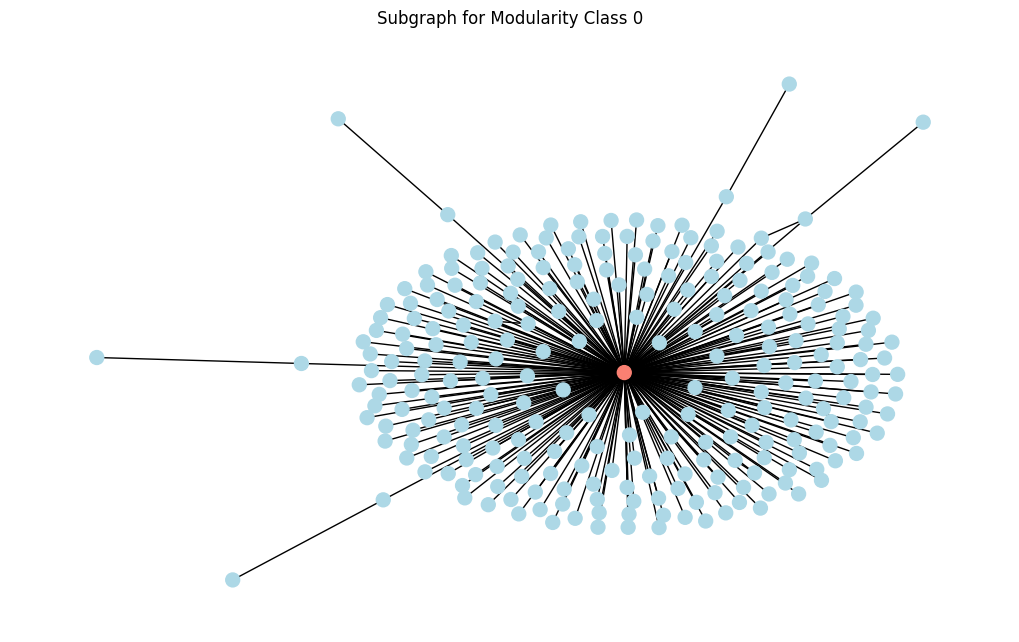

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

# Your code to create the subgraph and layout

# Define node colors (for example, 'lightblue' and 'salmon')
node_colors = ['lightblue' if node != center_node else 'salmon' for node in subgraph.nodes]

# Create the plot
plt.figure(figsize=(10, 6))
nx.draw(subgraph, pos, with_labels=False, node_size=100, font_size=8, node_color=node_colors)
plt.title(f'Subgraph for Modularity Class {selected_modularity_class}')
plt.show()


In [11]:
degree_centrality = nx.degree_centrality(subgraph)
center_node_degree_centrality = degree_centrality[center_node]
print(f"Degree Centrality of the center node: {center_node_degree_centrality:.3f}")

Degree Centrality of the center node: 0.981


In [12]:
eigenvector_centrality = nx.eigenvector_centrality(subgraph)
node_eigenvector_centrality = eigenvector_centrality[center_node]
print(f"Eigenvector Centrality of the center node: {node_eigenvector_centrality:.3f}")

Eigenvector Centrality of the center node: 0.707


In [13]:
betweenness_centrality = nx.betweenness_centrality(subgraph)
node_betweenness_centrality = betweenness_centrality[center_node]
print(f"Betweenness Centrality of the center node: {node_betweenness_centrality:.3f}")

Betweenness Centrality of the center node: 1.000


In [14]:
closeness_centrality = nx.closeness_centrality(subgraph)
node_closeness_centrality = closeness_centrality[center_node]
print(f"Closeness Centrality of the center node: {node_closeness_centrality:.3f}")

Closeness Centrality of the center node: 0.981


In [15]:
# Extract the first-degree connections
first_degree_connections = list(G.neighbors(center_node))

# Print the number of first-degree connections
print(f"Node {center_node} has {len(first_degree_connections)} first-degree friends.")


Node AvianLawman has 305 first-degree friends.


In [16]:
# Load your JSON data from the file
with open('VADER_sentiment_per_comment.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Extract comments and sort them by the number of upvotes (descending order)
comments = []
for post_data in data:
    comments.extend(post_data.get('comments', []))
    
# Find the body by AvianLawman
target_author = "AvianLawman"
found_body = None

for entry in comments:
    if entry["author"] == target_author:
        found_body = entry["body"]
        found_date = entry['date']
        found_reply = entry['num_replies']
        found_class = entry['sentiment_score']
        print(f"Body by {target_author}: {found_body}")
        print(f'Posted on: {found_date}')
        print(found_reply)
        print(f'{found_class}')

Body by AvianLawman: I agree, still seems like gate keeping though.
Posted on: 2019-09-24T15:33:06
4
0.6124
Body by AvianLawman: I agree, still is gate keeping though. Did not expect to cause an uproar tbh
Posted on: 2019-09-24T21:07:18
0
0.3612
Body by AvianLawman: Was on a vegan page
Posted on: 2019-09-24T17:10:28
1
0.0
Body by AvianLawman: In no way was I taking a jab at vegans. I do agree with the message. However, the sign is definitely gate keeping. And oh would you look at the sub we are in.
Posted on: 2019-09-24T20:59:25
0
0.6369
Body by AvianLawman: Who are you even talking about? You can’t see who is holding up the sign...
Posted on: 2019-09-24T17:21:10
0
0.0
Body by AvianLawman: Again, I agree with this.
Posted on: 2019-09-24T17:11:10
1
0.3612


From the all of his comments details above, AvianLawman is not the person who got the top Positive either negative sentiment.
He did not get the largest number of replies to his own commment. 

In [17]:
# Find the body by AvianLawman
target_author = "Pathfinder24"
found_body = None

for entry in comments:
    if entry["author"] == target_author:
        found_body = entry["body"]
        found_date = entry['date']
        found_score = entry['sentiment_score']
        print(f"Body by {target_author}: {found_body}")
        print(f'Posted on: {found_date}')
        print(found_score)

Body by Pathfinder24: Not all gatekeeping is wrong. There is nothing wrong with this. It's like "shut up about civil rights if you own slaves".
Posted on: 2019-09-24T21:03:47
-0.8079


In [18]:
# Find the body by AvianLawman
target_author = "Currie_Climax"
found_body = None

for entry in comments:
    if entry["author"] == target_author:
        found_body = entry["body"]
        found_date = entry['date']
        found_score = entry['sentiment_score']
        print(f"Body by {target_author}: {found_body}")
        print(f'Posted on: {found_date}')
        print(found_score)

Body by Currie_Climax: It is gatekeeping but it actually does have a really good point. A lot of people who want to make a difference with climate change are ignorant to one of the biggest issues causing it: mass meat production.

I wouldn't say "shut the fuck up" to someone because of their ignorance. I understand the sentiment of wanting them to educate themselves before participating fully in the conversation though
Posted on: 2019-09-24T17:09:33
-0.5584
Body by Currie_Climax: Yeah but that's not very attention grabbing. It could be said a lot better, this just happens to be eye grabbing
Posted on: 2019-09-24T19:19:57
0.6249
Body by Currie_Climax: I think we should push on all fronts instead of gambling on unreasonable people trying to be reasonable over a few fronts
Posted on: 2019-09-24T17:49:05
0.0
Body by Currie_Climax: I'm definitely not underestimating it. I'm just saying I'd give the chance to explain the relation with meat and climate change before just telling them to shut 

### Who is the top comment contributor among the topic 'Only vegans can care about climate change'?

In [19]:
# Extract comments for 'Only vegans can care about climate change'
only_vegans_comments = []
for post_data in data:
    if post_data['title'] == 'Only vegans can care about climate change':
        only_vegans_comments.extend(post_data.get('comments', []))

In [20]:
only_vegans_comments

[{'author': 'cfwang1337',
  'body': "What if your mouth is full of human meat? I'm only a humanitarian, after all...",
  'date': '2019-09-24T17:00:54',
  'score': 3340,
  'num_upvotes': 3340,
  'num_downvotes': 0,
  'num_replies': 15,
  'sentiment_score': 0.0},
 {'author': 'IDinnaeKen',
  'body': 'To be fair (and I’m not a vegan), reducing the amount of meat we eat is one of the most environmentally impactful things that we can actually do. The rest of it lies in the hands of big industry, but I’ve been trying really hard to go vegetarian on weekdays. The meat industry is one of the biggest polluters on the planet.',
  'date': '2019-09-24T21:21:05',
  'score': 731,
  'num_upvotes': 731,
  'num_downvotes': 0,
  'num_replies': 0,
  'sentiment_score': -0.6361},
 {'author': 'APotatoFlewAround_',
  'body': 'As a meat eater the meat and dairy industry do contribute a HUGE amount to climate change.',
  'date': '2019-09-24T17:53:03',
  'score': 599,
  'num_upvotes': 599,
  'num_downvotes': 0,


In [21]:
from collections import Counter
# Create a Counter for authors
author_counter = Counter(comment['author'] for comment in only_vegans_comments)

# Get the top authors with the most comments
top_10_authors = author_counter.most_common(10)

# Print the top authors and their comment counts
for author, count in top_10_authors:
    print(f"Author: {author}, : {count}")

Author: None, : 352
Author: phunanon, : 29
Author: YeahWhyNot, : 19
Author: Cactusofthesea, : 18
Author: Myerz99, : 15
Author: Talmonis, : 13
Author: bronet, : 12
Author: EndermTheHunter, : 12
Author: Carnae_Assada, : 12
Author: cztrollolcz, : 11


In [22]:
# Create a dictionary to store the total scores for each author
author_scores = {}

# Calculate the total scores for each author
for comment in only_vegans_comments:
    author = comment["author"]
    score = comment["score"]
    if author in author_scores:
        author_scores[author] += score
    else:
        author_scores[author] = score

# Sort authors by total scores in descending order and get the top 10
top_10_authors = sorted(author_scores.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 authors and their total scores
for author, total_score in top_10_authors:
    print(f"Author: {author}, Total Score: {total_score}")

Author: None, Total Score: 10341
Author: cfwang1337, Total Score: 3340
Author: YeahWhyNot, Total Score: 2346
Author: agha0013, Total Score: 2313
Author: dude_icus, Total Score: 1357
Author: wadamday, Total Score: 749
Author: IDinnaeKen, Total Score: 736
Author: APotatoFlewAround_, Total Score: 643
Author: JonSnoker, Total Score: 572
Author: doinkrr, Total Score: 561


In [23]:
# Change 'only_vegans_comments' list to datafrme
only_vegans_df = pd.DataFrame(only_vegans_comments)

# Change 'created_date' is in datetime
only_vegans_df["date"] = pd.to_datetime(only_vegans_df["date"])
only_vegans_df["date"].min(), only_vegans_df["date"].max()

(Timestamp('2019-09-24 15:24:24'), Timestamp('2019-09-24 21:26:53'))

This thread was posted on 2019-09-24 15:24:24 and was active until on 2019-09-24 21:26:53.

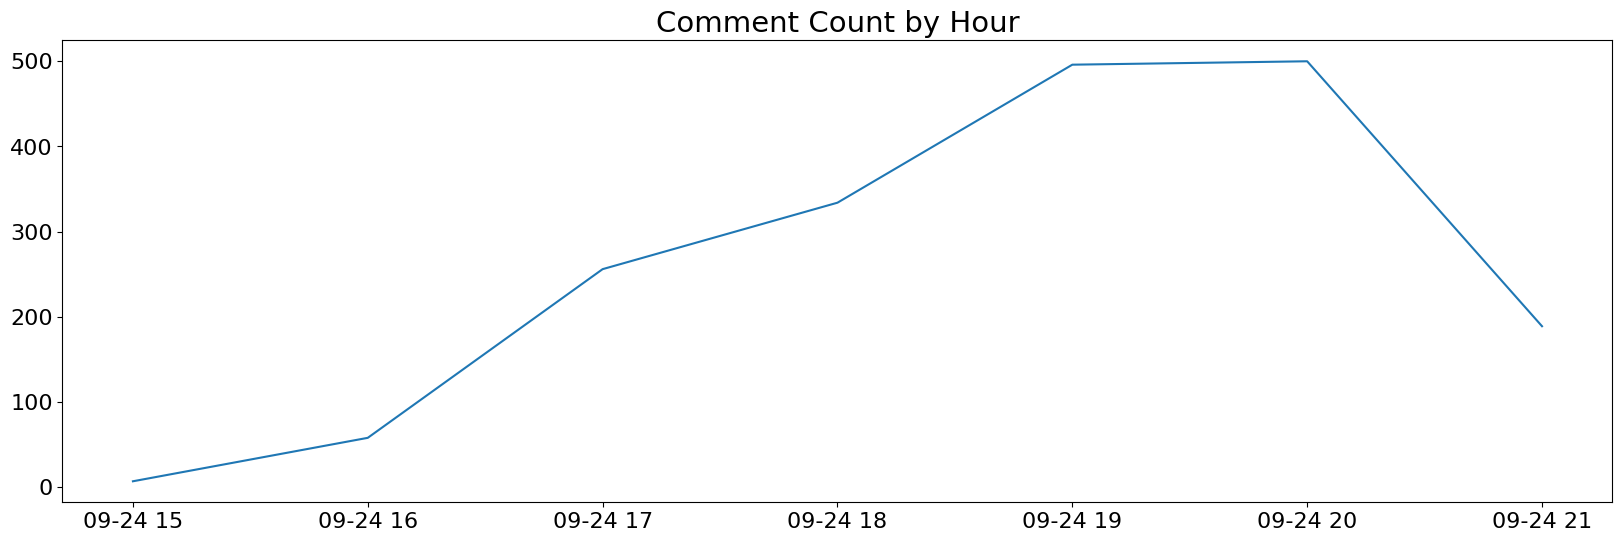

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Group submissions by day and count them
hourly_counts = only_vegans_df.resample('H', on='date').size()

# Create the time series plot
plt.figure(figsize=(20, 6))
plt.plot(hourly_counts.index, hourly_counts.values)
plt.title('Comment Count by Hour', fontsize=21)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(False)
plt.show()

In [25]:
# Find the comment about AvianLawman
target_author = "AvianLawman"

for comment in only_vegans_comments:
    if target_author in comment['body']:
        print(comment['author'])
        print(comment['body'])
        print(comment['date'])

AutoModerator
Thanks for your submission, AvianLawman!

Please remember to censor out any identifying details and that satire is only allowed on weekends. If this post is truly gatekeeping, upvote it! If it's not gatekeeping or if it breaks any other rules, downvote this comment and REPORT the post so we can see it!


*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/gatekeeping) if you have any questions or concerns.*
2019-09-24T15:24:24


In summary, AvianLawman is the author of 'Only vegans can care about climate change'. Because he received the first comment from AutoModerator as we can see above. It was posted by AutoModerator on 2019-09-24 15:24:24. This is exactly the same time this thread was posted. Therefore, AvianLawman is the author of this thread, and the centre of the community with 718 nodes. This community might be formed along with that thread.  

## VADER method

In [26]:
# To avoid repeative writing the same code, the following will be called
%load_ext autoreload
%autoreload 1
%aimport RedditProcessing

In [27]:
only_vegans_df

,author,body,date,score,num_upvotes,num_downvotes,num_replies,sentiment_score
0,cfwang1337,What if your mouth is full of human meat? I'm ...,2019-09-24 17:00:54,3340,3340,0,15,0.0000
1,IDinnaeKen,"To be fair (and I’m not a vegan), reducing the...",2019-09-24 21:21:05,731,731,0,0,-0.6361
2,APotatoFlewAround_,As a meat eater the meat and dairy industry do...,2019-09-24 17:53:03,599,599,0,5,0.3182
3,YeahWhyNot,I agree this is gatekeeping. No one should be ...,2019-09-24 16:06:05,2287,2287,0,33,0.8957
4,None,Not a vegan but the point is real. Meat produc...,2019-09-24 17:29:30,2518,2518,0,21,0.0772
...,...,...,...,...,...,...,...,...
1835,IHeartRaimundo,"Yeah, there’s really no point in having a disc...",2019-09-24 18:11:52,2,2,0,0,0.4588
1836,Insertnamesz,"Gr8 b8 m8, you got all these people",2019-09-24 19:17:21,2,2,0,0,0.7269
1837,GreatGreen286,Cool and why should I give a fuck about what G...,2019-09-24 20:36:46,1,1,0,0,-0.8519
1838,Carnae_Assada,You were being wildly passive agresive and if ...,2019-09-24 18:44:22,0,0,0,1,0.2023


### Count total number of Positive, Negative, and Neutral Sentiment (Vader)

In [28]:
# Define a function to add the 'status' column based on the 'temperature'
def add_sentiment_vader(sentiment):
    if sentiment >= 0.05:
        return 'Positive'
    elif sentiment <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [29]:
# Initialize an empty list to store scores
scores = []

# Iterate through the comments and extract sentiment scores
for comment in only_vegans_comments:
    sentiment_score = comment.get('sentiment_score', None)
    if sentiment_score is not None:
        scores.append(sentiment_score)

# Initialize an empty list to store sentiment classification
classes = []        
        
for score in scores:
    classification = add_sentiment_vader(score)
    classes.append(classification)

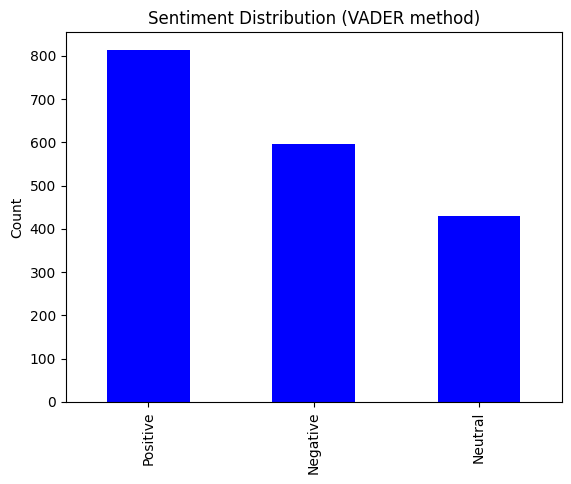

In [30]:
# Create a Pandas Series to count the occurrences of each class
sentiment_counts = pd.Series(classes).value_counts()

# Plot the class counts as a bar chart
sentiment_counts.plot(kind='bar', color='blue')

# Add labels and title
plt.xlabel('')
plt.ylabel('Count')
plt.title('Sentiment Distribution (VADER method)')

# Display the plot
plt.show()

## Topic Modelling

In [31]:
texts = []

# find the list of comments
for submission in only_vegans_comments:
    postText = submission['body']
    texts.append(postText)

lower = []

# convert all into lower case
for string in texts:
    lowercase = string.lower()
    lower.append(lowercase)

import re

# Function to preprocess and tokenize text
def replacement(text):
    # Define a regular expression pattern to match URLs
    url_pattern = re.compile(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+")

    # Replace strings starting with ![gif] with the placeholder
    gif_pattern = re.compile(r"!\[gif\]\([^)]+\)")

    # Define a regular expression pattern to match images
    img_pattern = re.compile(r"!\[img\]\([^)]+\)")


    # Placeholder token for URLs
    url_token = "__URL__"

    # Placeholder token for GIFs
    gif_token = "__GIF__"

    # Placeholder token for images
    img_token = "__img__"

    # Replace URLs with the placeholder token
    text_without_urls = re.sub(url_pattern, url_token, text)
    
    # Replace GIFs with the placeholder token
    text_without_gifs = re.sub(gif_pattern, gif_token, text_without_urls)
    
    # Replace images with the placeholder token
    text_without_images = re.sub(img_pattern, img_token, text_without_gifs)
    return text_without_images

# Apply the function to each string in the list
replaced = [replacement(s) for s in lower]

from nltk.tokenize import word_tokenize

def tokenisation(text):
    tokens = word_tokenize(text)
    return tokens

replaced_tk = [tokenisation(word) for word in replaced]

import string
import nltk
nltk.download('stopwords')

# use the punctuation symbols defined in string.punctuation
lPunct = list(string.punctuation)

# use stopwords from nltk and added 'us', and 'one'
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['us'] + ['one'] + ['via'] + ['’'] + ['...'] + ['“'] + ['”'] + ['deleted'] + ['removed'] + ['gon']+ ['na']

# remove stopwords, digits, and fractions
replaced_tk_stop = []
for tokens in replaced_tk:
    for tok in tokens:
        if tok.isalpha():
            if tok not in lStopwords:
                replaced_tk_stop.append(tok)
                

                
# remove stop words
new_list = []
list_of_list = []
for tokens in replaced_tk:
    for tok in tokens:
        if tok.isalpha():
            if tok not in lStopwords:
                new_list.append(tok)
    list_of_list.append(new_list)
    new_list =[]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lisa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### LDA Model

In [32]:
import gensim
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel, LdaModel
from gensim.corpora import Dictionary

In [33]:
dictionary = gensim.corpora.Dictionary(list_of_list)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10000:
        break

0 full
1 human
2 humanitarian
3 meat
4 mouth
5 actually
6 amount
7 big
8 biggest
9 eat
10 environmentally
11 fair
12 go
13 hands
14 hard
15 impactful
16 industry
17 lies
18 planet
19 polluters
20 really
21 reducing
22 rest
23 things
24 trying
25 vegan
26 vegetarian
27 weekdays
28 change
29 climate
30 contribute
31 dairy
32 eater
33 huge
34 agree
35 agriculture
36 animal
37 contributor
38 easiest
39 gatekeeping
40 going
41 impact
42 individual
43 made
44 main
45 make
46 point
47 positive
48 shut
49 solid
50 talking
51 thing
52 told
53 accounts
54 could
55 driving
56 gasses
57 green
58 house
59 like
60 nations
61 pollution
62 production
63 real
64 stop
65 today
66 would
67 causes
68 deforestation
69 less
70 local
71 lot
72 mass
73 consumption
74 diet
75 eating
76 even
77 highly
78 lessened
79 may
80 meatless
81 monday
82 people
83 primarily
84 recommend
85 something
86 think
87 try
88 veg
89 year
90 able
91 bacon
92 beef
93 cant
94 eggs
95 else
96 everyone
97 everything
98 except
99 food

In [34]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [35]:
corpus = [dictionary.doc2bow(doc) for doc in list_of_list]
corpus[310]

[(2, 2),
 (12, 1),
 (14, 1),
 (17, 1),
 (20, 2),
 (21, 1),
 (34, 1),
 (44, 1),
 (54, 1),
 (75, 1),
 (77, 1),
 (85, 1),
 (93, 1),
 (94, 2),
 (146, 1),
 (159, 1),
 (174, 1),
 (236, 2),
 (240, 1),
 (244, 1),
 (279, 1),
 (305, 1),
 (306, 1),
 (308, 1),
 (312, 1),
 (315, 1),
 (341, 1),
 (370, 2),
 (378, 1),
 (387, 1)]

### Running LDA using Bag of Words

In [36]:
lda_model = gensim.models.LdaMulticore(corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [37]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.037*"meat" + 0.026*"vegan" + 0.017*"people" + 0.015*"feed" + 0.014*"food" + 0.014*"change" + 0.013*"go" + 0.012*"would" + 0.011*"climate" + 0.010*"demand"
Topic: 1 
Words: 0.049*"meat" + 0.023*"people" + 0.020*"also" + 0.019*"even" + 0.018*"would" + 0.017*"vegan" + 0.014*"sign" + 0.014*"consumption" + 0.014*"world" + 0.012*"like"
Topic: 2 
Words: 0.046*"meat" + 0.042*"eating" + 0.023*"stop" + 0.016*"cows" + 0.016*"eat" + 0.016*"vegan" + 0.015*"people" + 0.014*"go" + 0.014*"get" + 0.011*"things"
Topic: 3 
Words: 0.045*"meat" + 0.015*"eating" + 0.014*"vegans" + 0.013*"vegan" + 0.013*"crops" + 0.012*"think" + 0.012*"way" + 0.012*"diet" + 0.012*"every" + 0.012*"day"
Topic: 4 
Words: 0.031*"meat" + 0.020*"like" + 0.018*"think" + 0.017*"eat" + 0.016*"emissions" + 0.014*"yeah" + 0.012*"world" + 0.012*"wrong" + 0.012*"mean" + 0.012*"eating"
Topic: 5 
Words: 0.067*"meat" + 0.031*"people" + 0.020*"eat" + 0.020*"vegan" + 0.018*"eating" + 0.016*"know" + 0.016*"like" + 0.015*"cha